# TEXT CLASSIFICATION USING NAIVE BAYES AND SENTIMENT ANALYSIS ON BLOG POSTS

In [1]:
import pandas as pd
df = pd.read_csv('blogs_categories.csv')
df

,Unnamed: 0,Data,Labels
0,0,Xref: cantaloupe.srv.cs.cmu.edu alt.atheism:49...,alt.atheism
1,1,Xref: cantaloupe.srv.cs.cmu.edu alt.atheism:51...,alt.atheism
2,2,Newsgroups: alt.atheism\nPath: cantaloupe.srv....,alt.atheism
3,3,Xref: cantaloupe.srv.cs.cmu.edu alt.atheism:51...,alt.atheism
4,4,Xref: cantaloupe.srv.cs.cmu.edu alt.atheism:51...,alt.atheism
...,...,...,...
19992,19992,Xref: cantaloupe.srv.cs.cmu.edu alt.atheism:54...,talk.religion.misc
19993,19993,Xref: cantaloupe.srv.cs.cmu.edu alt.atheism:54...,talk.religion.misc
19994,19994,Xref: cantaloupe.srv.cs.cmu.edu talk.religion....,talk.religion.misc
19995,19995,Xref: cantaloupe.srv.cs.cmu.edu talk.religion....,talk.religion.misc


In [2]:
print(df.head())
print(df.info())

   Unnamed: 0                                               Data       Labels
0           0  Xref: cantaloupe.srv.cs.cmu.edu alt.atheism:49...  alt.atheism
1           1  Xref: cantaloupe.srv.cs.cmu.edu alt.atheism:51...  alt.atheism
2           2  Newsgroups: alt.atheism\nPath: cantaloupe.srv....  alt.atheism
3           3  Xref: cantaloupe.srv.cs.cmu.edu alt.atheism:51...  alt.atheism
4           4  Xref: cantaloupe.srv.cs.cmu.edu alt.atheism:51...  alt.atheism
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19997 entries, 0 to 19996
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  19997 non-null  int64 
 1   Data        19997 non-null  object
 2   Labels      19997 non-null  object
dtypes: int64(1), object(2)
memory usage: 468.8+ KB
None


In [3]:

print(df['Labels'].value_counts())

alt.atheism                 1000
comp.graphics               1000
talk.politics.misc          1000
talk.politics.mideast       1000
talk.politics.guns          1000
sci.space                   1000
sci.med                     1000
sci.electronics             1000
sci.crypt                   1000
rec.sport.hockey            1000
rec.sport.baseball          1000
rec.motorcycles             1000
rec.autos                   1000
misc.forsale                1000
comp.windows.x              1000
comp.sys.mac.hardware       1000
comp.sys.ibm.pc.hardware    1000
comp.os.ms-windows.misc     1000
talk.religion.misc          1000
soc.religion.christian       997
Name: Labels, dtype: int64


    Explore the distribution of categories

<Axes: xlabel='count', ylabel='Labels'>

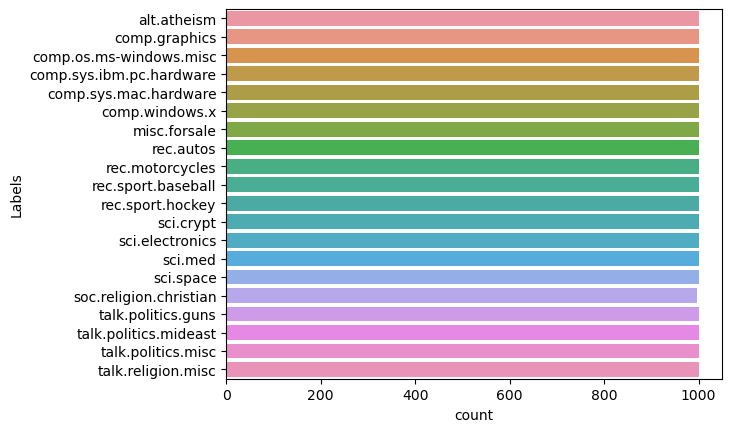

In [4]:
import seaborn as sns
import nltk
sns.countplot(y='Labels', data=df)

In [5]:
df['Cleaned_Text'] = df['Data'].str.lower()

In [6]:
df['Cleaned_Text'] = df['Cleaned_Text'].str.replace('[^\w\s]', '', regex=True)

    Tokenization

In [7]:
from nltk.tokenize import word_tokenize

df['Tokenized_Text'] = df['Cleaned_Text'].apply(word_tokenize)

In [8]:
from nltk.corpus import stopwords

stop_words = set(stopwords.words('english'))
df['Filtered_Text'] = df['Tokenized_Text'].apply(lambda x: [word for word in x if word not in stop_words])


from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_vectorizer = TfidfVectorizer()
X_tfidf = tfidf_vectorizer.fit_transform(df['Filtered_Text'].apply(lambda x: ' '.join(x)))

# 2. Naive Bayes Model for Text Classification

In [9]:
from sklearn.model_selection import train_test_split

X = df['Cleaned_Text']  # Features
y = df['Labels']         # Target variable

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [10]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline

# Define a pipeline for text classification
text_clf = Pipeline([
    ('tfidf', TfidfVectorizer()),
    ('clf', MultinomialNB()),
])

# Train the classifier
text_clf.fit(X_train, y_train)

# Make predictions
y_pred = text_clf.predict(X_test)

In [11]:
from sklearn.metrics import classification_report, accuracy_score

# Print classification report
print(classification_report(y_test, y_pred))

# Print accuracy score
print("Accuracy:", accuracy_score(y_test, y_pred))

                          precision    recall  f1-score   support

             alt.atheism       0.67      0.80      0.73       173
           comp.graphics       0.88      0.89      0.89       179
 comp.os.ms-windows.misc       0.94      0.85      0.89       226
comp.sys.ibm.pc.hardware       0.83      0.86      0.84       204
   comp.sys.mac.hardware       0.90      0.94      0.92       205
          comp.windows.x       0.98      0.92      0.95       186
            misc.forsale       0.93      0.71      0.80       190
               rec.autos       0.89      0.94      0.91       203
         rec.motorcycles       1.00      0.94      0.97       218
      rec.sport.baseball       0.99      0.98      0.99       192
        rec.sport.hockey       0.98      0.99      0.98       203
               sci.crypt       0.83      0.98      0.90       200
         sci.electronics       0.95      0.86      0.91       227
                 sci.med       1.00      0.93      0.96       196
         

# 3. Sentiment Analysis

In [12]:
import nltk
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\New\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [13]:
from nltk.sentiment import SentimentIntensityAnalyzer

# Initialize the VADER sentiment analyzer
sia = SentimentIntensityAnalyzer()

# Function to get sentiment polarity
def get_sentiment(text):
    sentiment = sia.polarity_scores(text)
    if sentiment['compound'] > 0.05:
        return 'Positive'
    elif sentiment['compound'] < -0.05:
        return 'Negative'
    else:
        return 'Neutral'

# Apply sentiment analysis to each blog post
df['Sentiment'] = df['Data'].apply(get_sentiment)

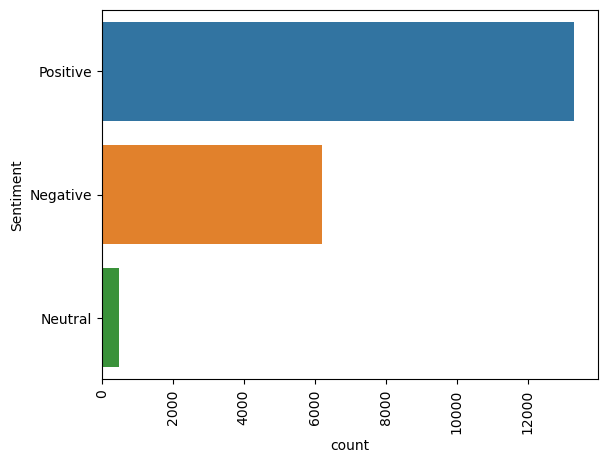

In [18]:
import seaborn as sns
import matplotlib.pyplot as plt

#sns.countplot(x='Labels', data=df)
sns.countplot( y='Sentiment', data=df)
plt.xticks(rotation=90)
plt.show()

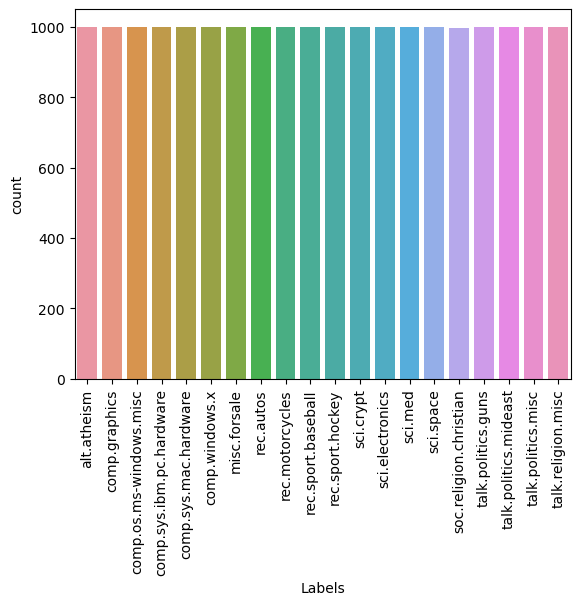

In [20]:
sns.countplot(x='Labels', data=df)
plt.xticks(rotation=90)
plt.show()

# 4. Evaluation

In [15]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)

# Calculate precision
precision = precision_score(y_test, y_pred, average='weighted')

# Calculate recall
recall = recall_score(y_test, y_pred, average='weighted')

# Calculate F1-score
f1 = f1_score(y_test, y_pred, average='weighted')

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)

Accuracy: 0.88275
Precision: 0.8861273536817106
Recall: 0.88275
F1-score: 0.8819281759219451
